<a href="https://colab.research.google.com/github/joaoeudes7/My-Analytics-Spotify/blob/master/My_Analytics_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages 


In [214]:
!pip install spotipy
!pip install wordcloud -q

## Imports


In [0]:
from os import path, getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
import spotipy.util as util
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [229]:
sns.set_style("whitegrid")
 
# Set yours credentials to resolve errors
username = "joaoedues7-br"
cid =''
secret = ''
scope = 'user-library-read playlist-read-private user-read-recently-played'
redirect = ''

token = util.prompt_for_user_token(
    username,  
    scope,
    client_id=cid, 
    client_secret=secret,
    redirect_uri=redirect) 

client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, 
    client_secret=secret
) 

# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp = spotipy.Spotify(auth=token)
sp.trace=False 

# playlists = sp.user_playlists('joaoeudes7-br')
# playlists = sp.current_user_playlists()
# playlists


                You need to set your Spotify API credentials.
                You can do this by setting environment variables like so:

                export SPOTIPY_CLIENT_ID='your-spotify-client-id'
                export SPOTIPY_CLIENT_SECRET='your-spotify-client-secret'
                export SPOTIPY_REDIRECT_URI='your-app-redirect-url'

                Get your credentials at
                    https://developer.spotify.com/my-applications
            


SpotifyException: ignored

## Getting songs

In [217]:
# By Playlist
# playlist1 = sp.user_playlist_tracks('joaoeudes7-br', '6xE6cjoFz9MLF6zcO9x5Lg', offset=0)
# playlist2 = sp.user_playlist_tracks('joaoeudes7-br', '6xE6cjoFz9MLF6zcO9x5Lg', offset=100)
# songs = playlist1['items'] + playlist2['items']

# Get tracks by Saved list
saveds1 = sp.current_user_saved_tracks(limit=50)
saveds2 = sp.current_user_saved_tracks(limit=50, offset=50)
saveds3 = sp.current_user_saved_tracks(limit=50, offset=100)
saveds4 = sp.current_user_saved_tracks(limit=50, offset=150)

songs = saveds1['items'] + saveds2['items'] + saveds3['items'] + saveds4['items']

df = pd.DataFrame(songs)
df

,added_at,track
0,2020-03-07T23:49:04Z,"{'album': {'album_type': 'single', 'artists': ..."
1,2020-03-07T22:29:30Z,"{'album': {'album_type': 'single', 'artists': ..."
2,2020-03-01T17:39:18Z,"{'album': {'album_type': 'single', 'artists': ..."
3,2020-03-01T14:10:04Z,"{'album': {'album_type': 'single', 'artists': ..."
4,2020-02-29T19:35:53Z,"{'album': {'album_type': 'album', 'artists': [..."
...,...,...
195,2019-08-04T02:32:41Z,"{'album': {'album_type': 'compilation', 'artis..."
196,2019-08-04T01:45:27Z,"{'album': {'album_type': 'album', 'artists': [..."
197,2019-08-03T23:42:38Z,"{'album': {'album_type': 'album', 'artists': [..."
198,2019-08-03T13:48:06Z,"{'album': {'album_type': 'single', 'artists': ..."


## Get data of artist, tracks and albums from spotify


In [218]:
musics_details = []
artists = []

for i, item in enumerate(songs):
    track = item['track']
    artist = sp.artist(track['artists'][0]['id'])
    
    first_artist = track['artists'][0]

    musics_details.append(( first_artist['name'], track['name'], track['album']['name'], track['id'] ))
    artists.append(( first_artist['name'], first_artist['id'], artist['genres'], artist['popularity'] ))

musics = pd.DataFrame(musics_info, columns=('Artists', 'Name', 'Album', 'Id'))

musics

,Artists,Name,Album,Id
0,Mato Seco,Levante Popular,Levante Popular,3hvxkAVhVrt5jqt76MICS7
1,Teddy Swims,Someone You Loved,Someone You Loved,0voD3AU9IVGAyCXeV8GeSz
2,Mario,Let Me Love You,Let Me Love You,3ibKnFDaa3GhpPGlOUj7ff
3,Isak Danielson,Power,Power,6xtqvTdWdYZmKY0pSuuHL9
4,Pitty,Memórias,Anacrônico,0yfrIZmkRV80l28gDcz8nU
...,...,...,...,...
195,Akon,Lonely,Heartbreakers,4mNGNMcsoMS6F9SGycmHWM
196,Eminem,River (feat. Ed Sheeran),Revival,1cS0TgbR263ey9jn0MwD2s
197,Biquini Cavadão,Sobradinho - Ao Vivo,Biquini Cavadão Ao Vivo - Me Leve Sem Destino,4W5B9NlytynFeVYskjmiYP
198,Bruno Martini,Sun Goes Down,Sun Goes Down,2JpTwRVXioTZSdizBGAhUH


# Artists

In [219]:
df_artists = pd.DataFrame(artists, columns=('Name', 'Id', 'Genres', 'Popularity'))
df_artists

,Name,Id,Genres,Popularity
0,Mato Seco,2b3gMC15SnC8mwjnYiUXvx,"[brazilian hip hop, brazilian reggae]",53
1,Teddy Swims,33qOK5uJ8AR2xuQQAhHump,[],51
2,Mario,20s0P9QLxGqKuCsGwFsp7w,"[dance pop, deep pop r&b, hip pop, pop, post-t...",71
3,Isak Danielson,5ie2SvXgvXlTpyqkwLtSd7,"[indie cafe pop, swedish pop]",65
4,Pitty,2dmQ0vMD3THLMcz7DsvfaT,"[baile pop, brazilian rock, hard rock brasilei...",64
...,...,...,...,...
195,Akon,0z4gvV4rjIZ9wHck67ucSV,"[dance pop, pop]",81
196,Eminem,7dGJo4pcD2V6oG8kP0tJRR,"[detroit hip hop, g funk, hip hop, rap]",97
197,Biquini Cavadão,7E5dcvoiZra9wwBuXYAYTw,"[brazilian rock, brazilian ska, mpb, rock gauc...",57
198,Bruno Martini,5veVxxPm1vzgi6pO2iVA8L,"[brazilian edm, pop nacional]",72


# Genres

In [220]:
genres = []
for index, row in df_artists.iterrows():
    for i, item in enumerate(row['Genres']):
      genres.append(item)

genres_df = pd.DataFrame(genres, columns =['Count'])
genres_df

,Count
0,brazilian hip hop
1,brazilian reggae
2,dance pop
3,deep pop r&b
4,hip pop
...,...
562,rock nacional brasileiro
563,brazilian edm
564,pop nacional
565,brazilian edm


In [221]:
genres_df['Count'].value_counts()

pop                 50
dance pop           26
brazilian rock      21
post-teen pop       18
brazilian edm       18
                    ..
hip hop tuga         1
pop house            1
talent show          1
indie pop            1
funk das antigas     1
Name: Count, Length: 142, dtype: int64

In [222]:
musics['Artists'].value_counts().head(20)

Evanescence           7
Maroon 5              7
Imagine Dragons       6
Charlie Brown Jr.     5
Tribo da Periferia    4
KALEO                 4
Eminem                4
Alok                  4
Gusttavo Lima         4
SOJA                  4
Alan Walker           3
David Guetta          3
Sia                   3
Akon                  3
Biquini Cavadão       3
Pitty                 3
Fabio Brazza          3
Justin Bieber         2
Calvin Harris         2
Oriente               2
Name: Artists, dtype: int64

In [223]:
musics['Album'].value_counts().head(20)

Fallen                                        5
Evolve                                        4
Born In Babylon                               3
O Embaixador (ao Vivo)                        3
The Open Door                                 2
A/B                                           2
Red Pill Blues (Deluxe)                       2
Blurryface                                    2
The Eminem Show                               2
Camisa 10 joga bola até na chuva              2
Nothing but the Beat (Ultimate Edition)       2
The Search                                    2
Imunidade Musical                             2
V                                             2
Songs About Jane: 10th Anniversary Edition    2
In The Cities - Ao Vivo Em Cuiabá             2
I Want More / Break My Baby                   2
Colírio da Cólera                             2
Dua Lipa (Deluxe)                             2
Anacrônico                                    2
Name: Album, dtype: int64

### 50 most present Artists


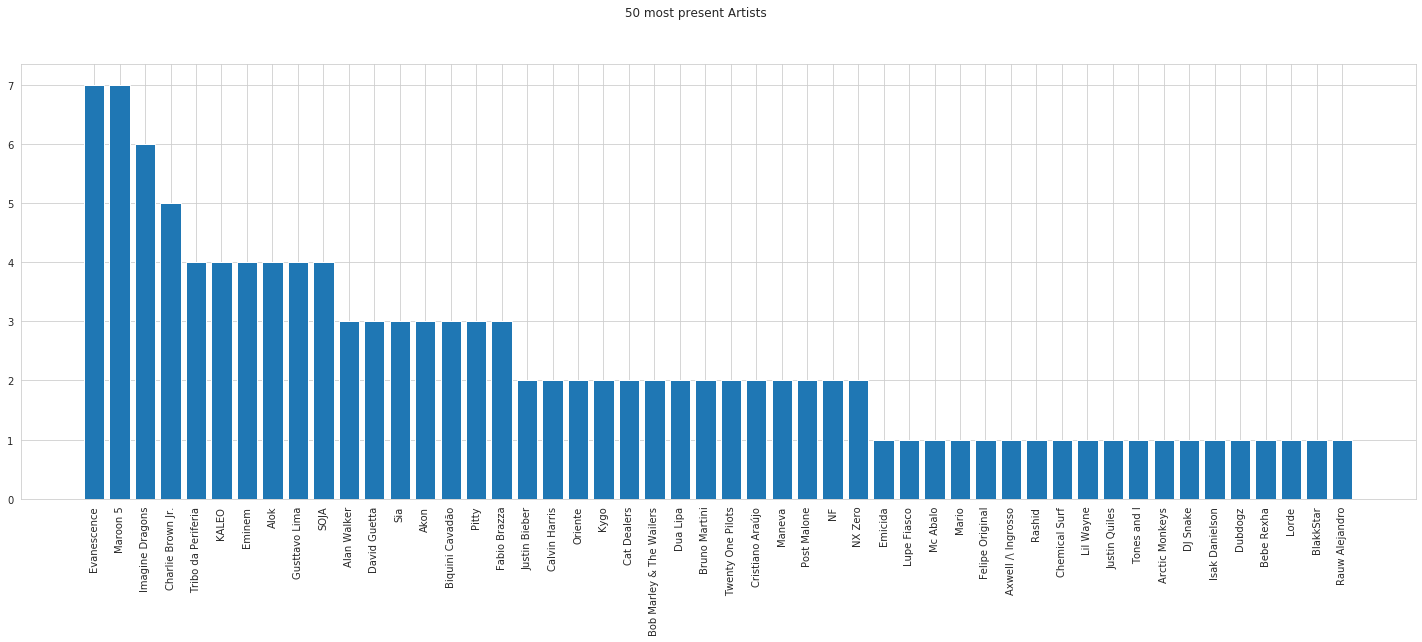

In [224]:
names = list(musics['Artists'].value_counts().keys())[:50]
values = list(musics['Artists'].value_counts())[:50]

fig, axs = plt.subplots(figsize=(25,8))

axs.bar(names, values)
plt.xticks(rotation=90);

fig.suptitle('50 most present Artists');

## 10 More presents Albums

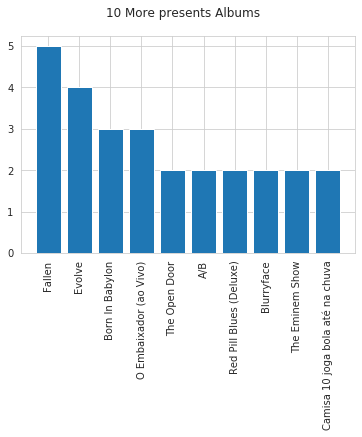

In [225]:
names = list(musics['Album'].value_counts().head(10).keys())
values = list(musics['Album'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('10 More presents Albums');

### 50 More presents Genre


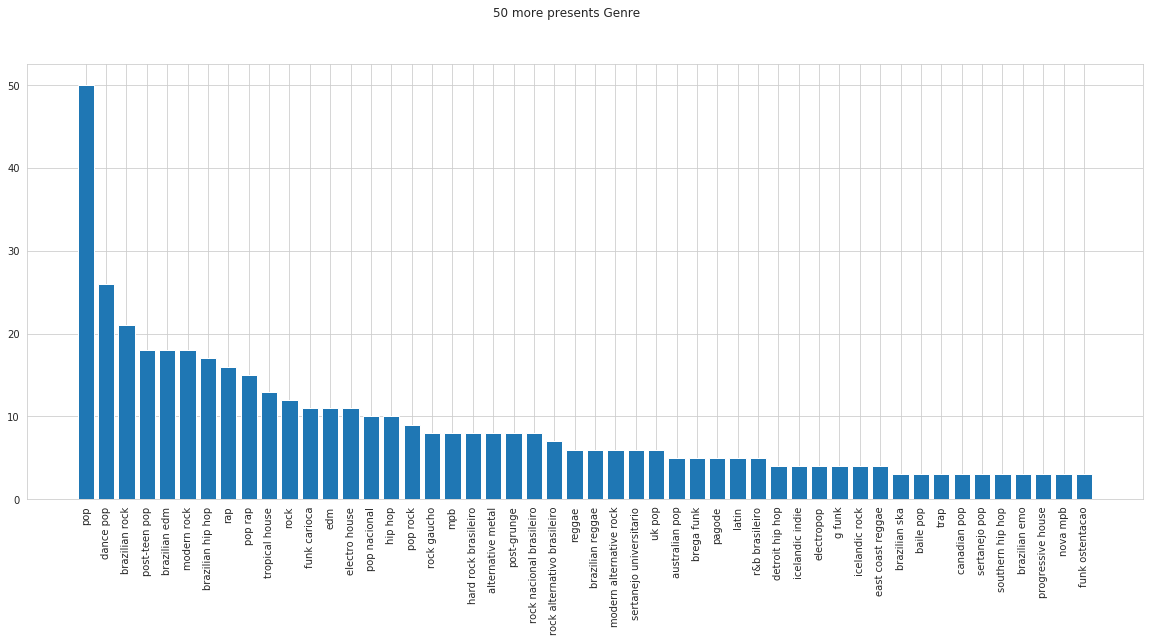

In [226]:
names = list(genres_df['Count'].value_counts().head(50).keys())
values = list(genres_df['Count'].value_counts().head(50))

fig, axs = plt.subplots(figsize=(20,8))

axs.bar(names, values)
plt.xticks(rotation=90);

fig.suptitle('50 more presents Genre');

## Artists popularity

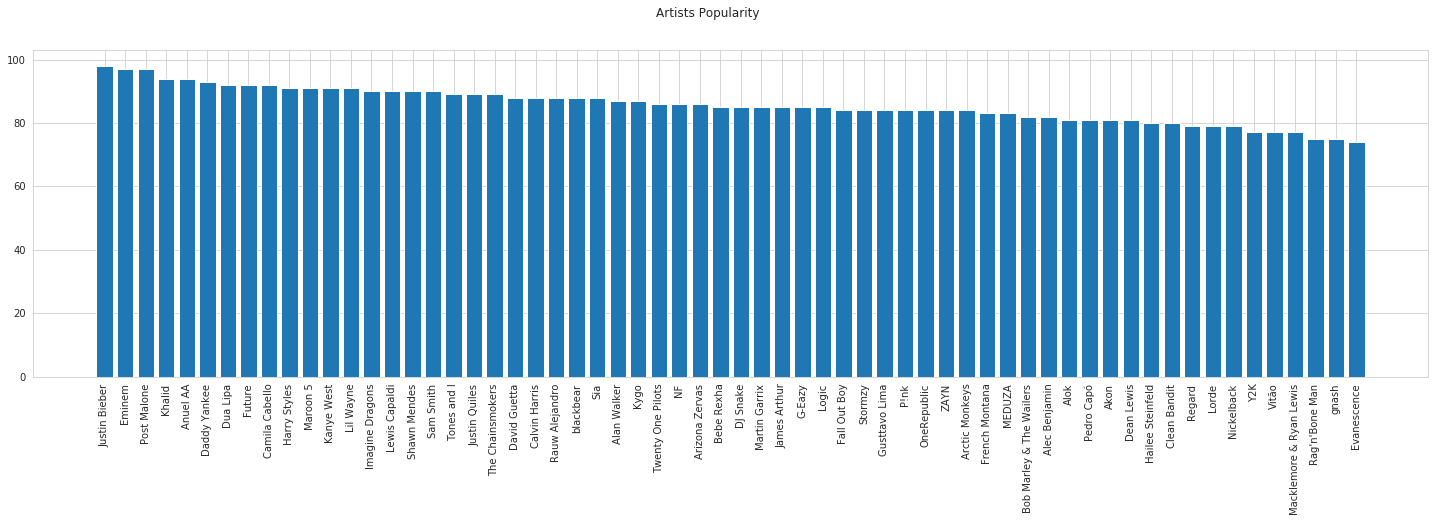

In [227]:
df_artists = df_artists.sort_values(by=['Popularity'], ascending=False)

names = df_artists['Name'].head(100)
values =  df_artists['Popularity'].head(100)

fig, axs = plt.subplots(figsize=(25,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Artists Popularity');

## Wordcloud

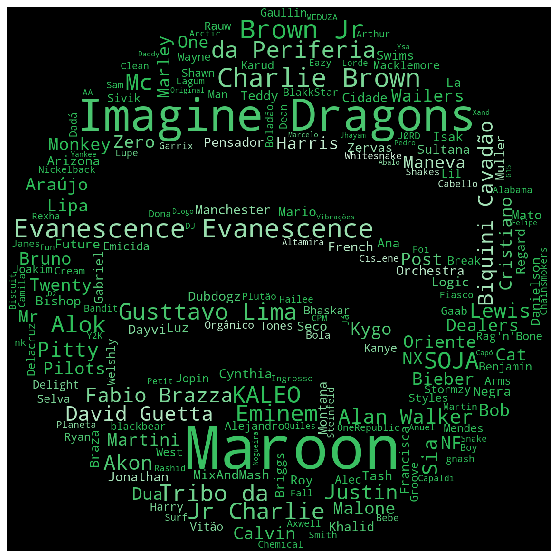

In [228]:
words = " ".join(s.strip() for s in musics['Artists'])

mask = np.array(Image.open(path.join(getcwd(), "spotify-logo.png")))
mask_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color="black", 
    width=800, 
    height=800,
    mask=mask,
    random_state=42
)

wc.generate(words)
wc.recolor(color_func=mask_colors)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wc)